In [1]:
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
# read the train and test dataset
import sklearn
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import svm
from sklearn import tree

In [2]:
data = pd.read_csv('Behavioral Biometrics/dataEditCopy.csv')
testData = pd.read_csv('Behavioral Biometrics/dataEditCopyLeftovers.csv')

In [3]:
data['51'] = pd.to_datetime(data['51'], unit='ms')
testData['51'] = pd.to_datetime(testData['51'], unit='ms')
data['51'] = data['51'].dt.dayofweek
testData['51'] = testData['51'].dt.dayofweek

In [4]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,112,392,280,368,88,144,56,144,88,272,...,624,688,64,334.545455,225.454545,330.181818,105.333333,3744,4,1
1,104,376,272,392,120,248,128,208,80,144,...,776,832,56,386.909091,272.727273,382.545455,109.333333,4312,4,1
2,104,240,136,232,96,216,120,208,88,192,...,216,288,72,309.090909,202.909091,306.181818,103.333333,3472,4,1
3,96,480,384,488,104,144,40,136,96,136,...,240,296,56,339.636364,234.181818,336.000000,101.333333,3792,4,1
4,112,448,336,456,120,208,88,184,96,248,...,416,480,64,360.000000,246.545455,355.636364,109.333333,4024,4,1


In [5]:
data.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52'],
      dtype='object')

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       99 non-null     int64  
 1   2       99 non-null     int64  
 2   3       99 non-null     int64  
 3   4       99 non-null     int64  
 4   5       99 non-null     int64  
 5   6       99 non-null     int64  
 6   7       99 non-null     int64  
 7   8       99 non-null     int64  
 8   9       99 non-null     int64  
 9   10      99 non-null     int64  
 10  11      99 non-null     int64  
 11  12      99 non-null     int64  
 12  13      99 non-null     int64  
 13  14      99 non-null     int64  
 14  15      99 non-null     int64  
 15  16      99 non-null     int64  
 16  17      99 non-null     int64  
 17  18      99 non-null     int64  
 18  19      99 non-null     int64  
 19  20      99 non-null     int64  
 20  21      99 non-null     int64  
 21  22      99 non-null     int64  
 22  23  

In [7]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,96.494949,529.909091,432.595960,526.929293,94.333333,205.060606,110.727273,209.141414,98.414141,225.272727,...,421.484848,516.010101,94.525253,334.175390,218.707989,333.921947,113.654040,3707.101010,3.909091,5.575758
std,30.564209,397.117345,398.785578,398.671909,30.583442,138.571194,140.432191,143.547405,33.862269,162.169086,...,423.637296,428.567512,37.774666,100.169273,88.087041,100.584801,31.770717,1187.416244,0.288943,2.962662
min,47.000000,125.000000,48.000000,126.000000,47.000000,77.000000,-16.000000,48.000000,10.000000,64.000000,...,96.000000,168.000000,48.000000,166.545455,93.181818,168.000000,69.583333,759.000000,3.000000,1.000000
25%,72.000000,291.500000,177.000000,280.500000,65.500000,128.000000,36.000000,120.500000,72.500000,125.500000,...,180.500000,272.000000,69.000000,256.000000,149.181818,257.090909,88.041667,2863.500000,4.000000,3.000000
50%,96.000000,376.000000,287.000000,391.000000,83.000000,162.000000,79.000000,168.000000,96.000000,176.000000,...,240.000000,372.000000,80.000000,313.545455,206.272727,314.272727,109.333333,3528.000000,4.000000,6.000000
75%,119.500000,624.000000,560.000000,624.000000,120.000000,223.500000,128.000000,224.000000,120.000000,244.000000,...,484.000000,576.000000,104.000000,395.227273,274.090909,396.272727,129.000000,4396.000000,4.000000,8.000000
max,176.000000,2290.000000,2191.000000,2322.000000,160.000000,944.000000,848.000000,896.000000,208.000000,864.000000,...,2376.000000,2480.000000,216.000000,649.454545,534.545455,646.545455,214.750000,7224.000000,4.000000,10.000000


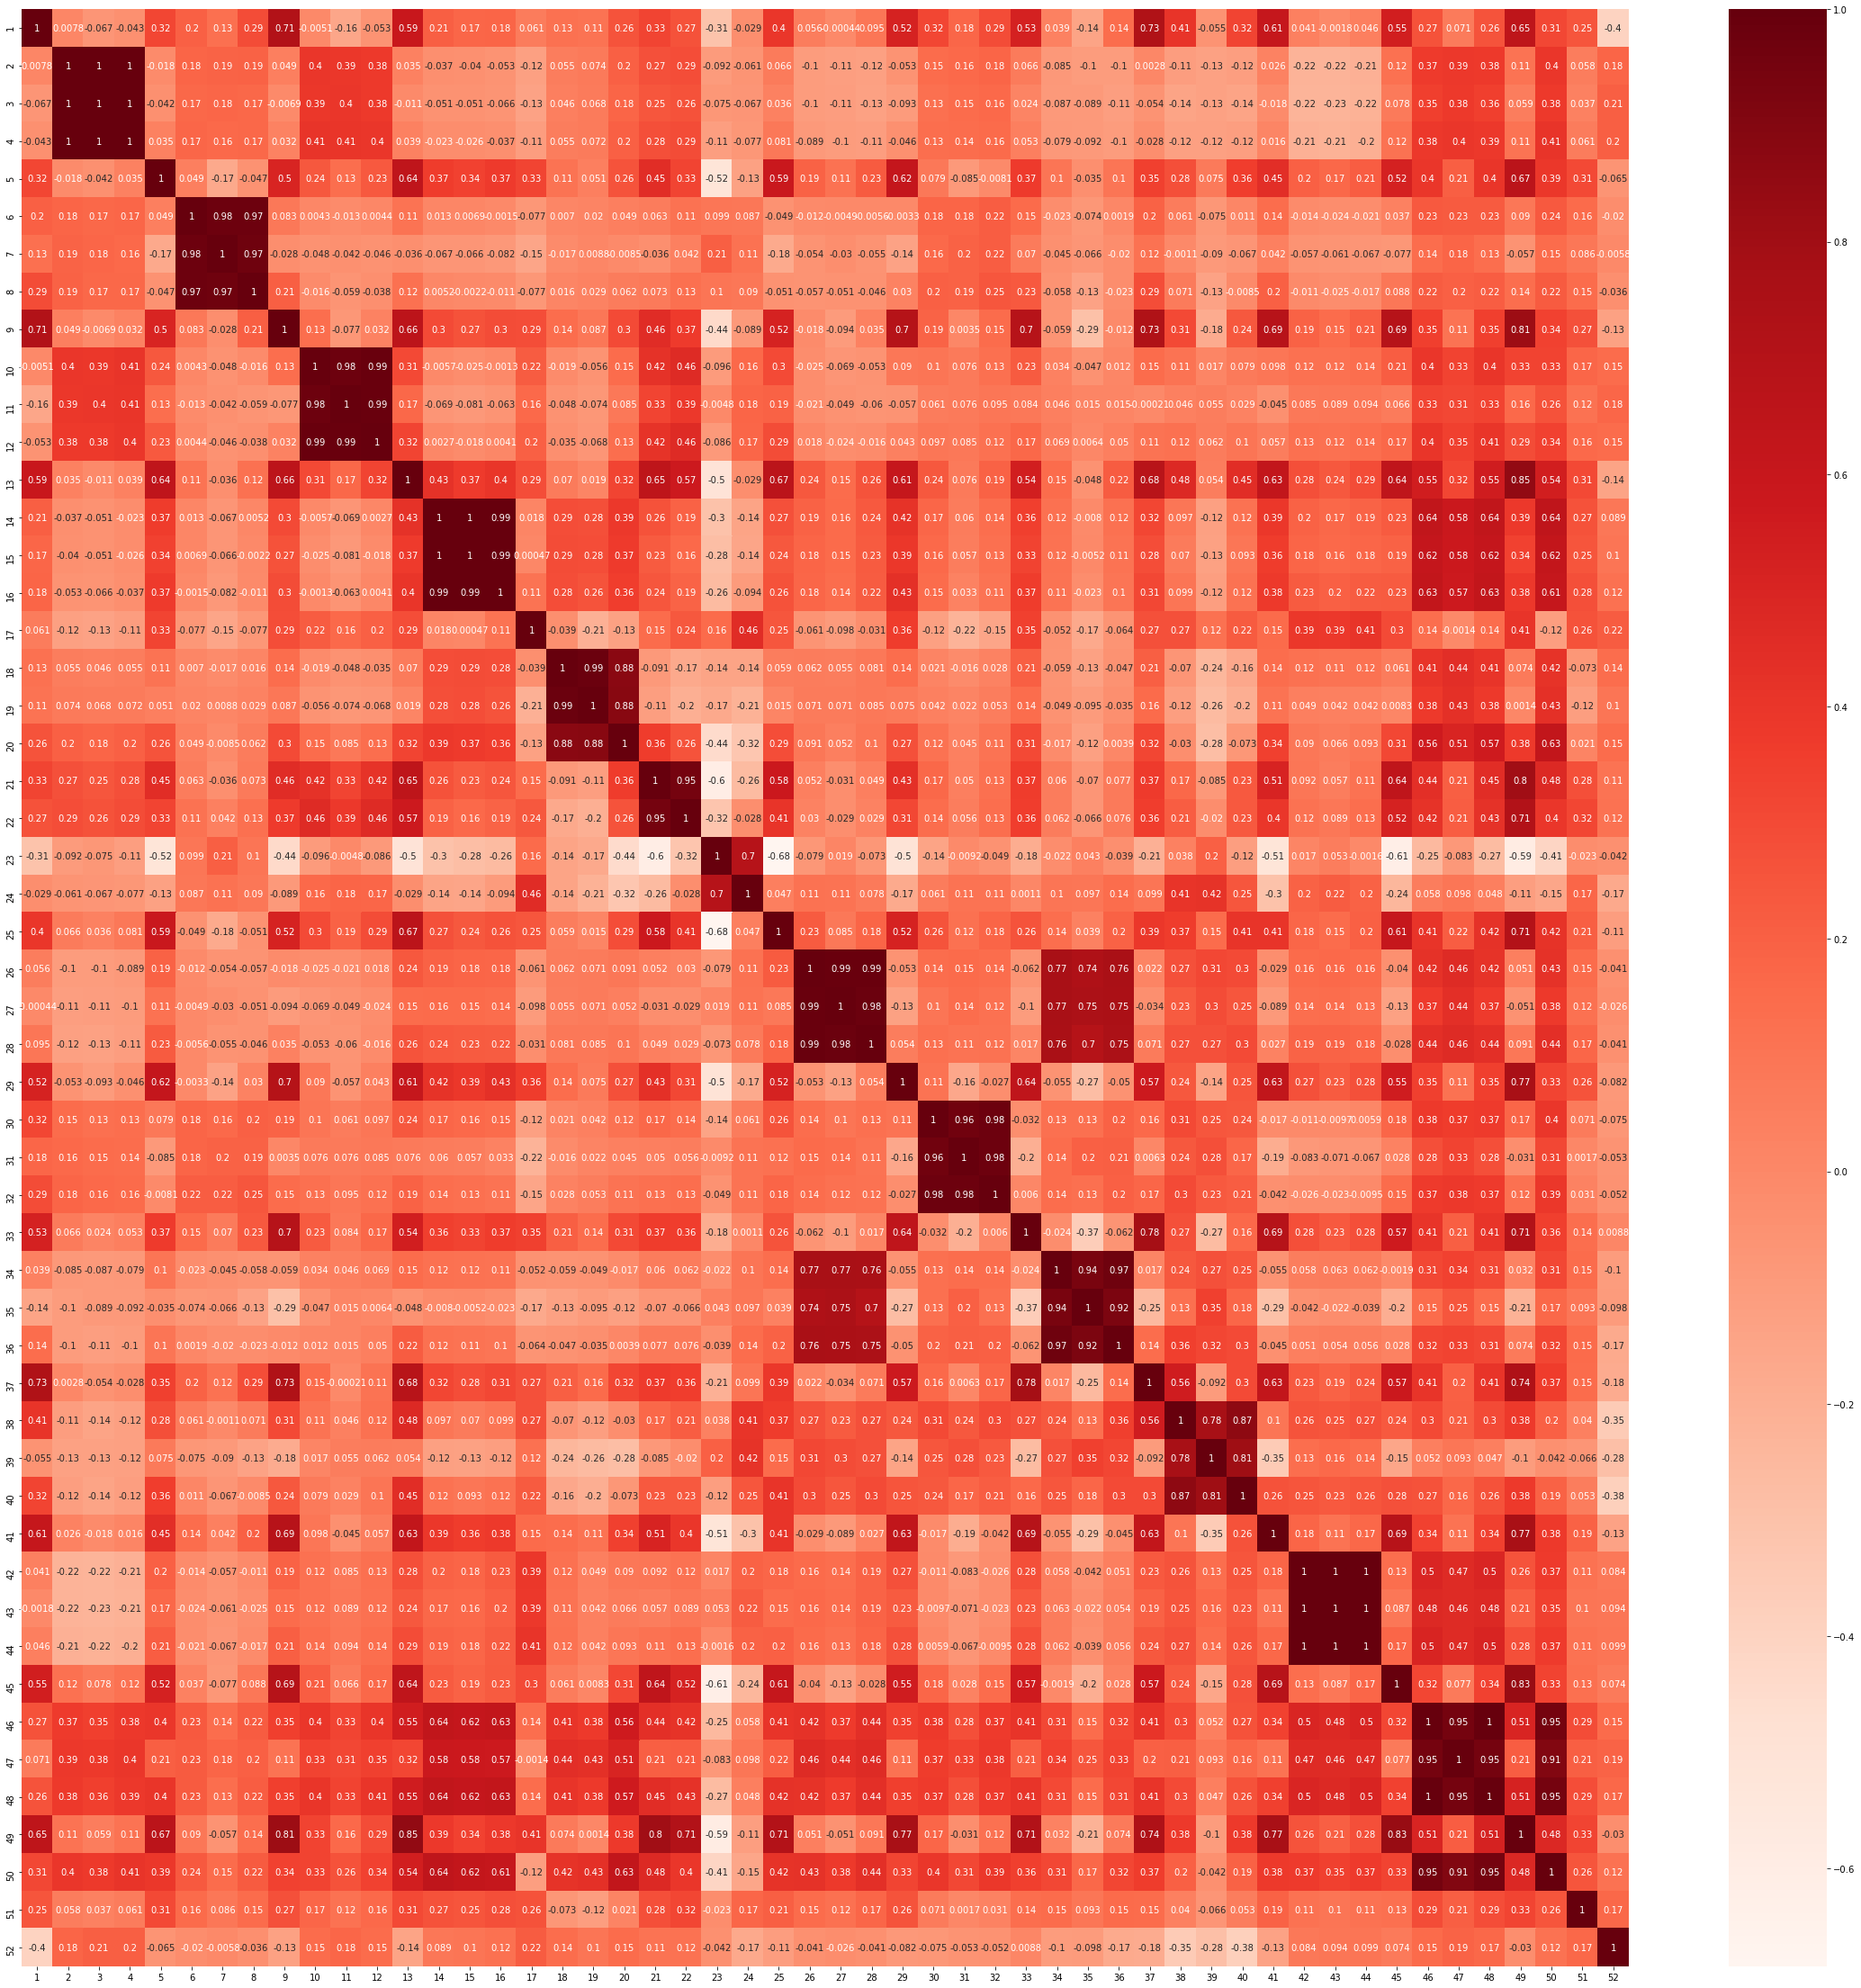

In [8]:
plt.figure(figsize=(40,40))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#correlation = data.corrwith(data, axis = 52)
#print(correlation)
correlation = data.corrwith(data["52"])
print(correlation.sort_values())
#data.corrwith(data["52"]).sort_values()

1    -0.396912
40   -0.377033
38   -0.350807
39   -0.284501
37   -0.178989
36   -0.171878
24   -0.166629
13   -0.142831
41   -0.133005
9    -0.130458
25   -0.111094
34   -0.102218
35   -0.098190
29   -0.081975
30   -0.075139
5    -0.064530
31   -0.052873
32   -0.052121
23   -0.041873
28   -0.041240
26   -0.041108
8    -0.036400
49   -0.030042
27   -0.025913
6    -0.020070
7    -0.005750
33    0.008772
45    0.073860
42    0.083586
14    0.088624
43    0.093857
44    0.099288
15    0.099807
19    0.102622
21    0.111062
22    0.115271
50    0.118450
16    0.123068
18    0.143530
12    0.146806
20    0.148577
10    0.148658
46    0.153037
48    0.165532
51    0.169049
11    0.176912
2     0.180592
47    0.188318
4     0.204370
3     0.209261
17    0.220002
52    1.000000
dtype: float64


In [10]:
train_data = data;
test_data = testData;
#test_data, train_data = sklearn.model_selection.train_test_split(data, train_size=.80, test_size=.20)
print(test_data.head())
print(train_data.head())
#reduce_data = train_data.drop(columns=['35','29','30','5','31','32','23','28','26','8','49','27','6','7','33','45','42','14','43','44','15'],axis=1)
#reduce_data = train_data.drop(columns=['5','36','25','13','35','29','34','28','26','37','27','30','24','9','41','31','49','32','42','43','43','44','23','33','6','21','45','8','14','7','22','15','19','16','17','18','50'],axis=1)

     1     2     3     4    5    6    7    8    9   10  ...   43   44  45  \
0   96   248   152   256  104  192   88  200  112  264  ...  552  631  79   
1   96  1536  1440  1568  128  328  200  288   88  248  ...  384  440  56   
2  128   320   192   288   96  160   64  168  104  176  ...  256  320  64   
3  104   856   752   872  120  128    8  104   96  704  ...  224  296  72   
4   96   176    80   208  128  144   16  112   96  144  ...  160  240  80   

           46          47          48          49    50  51  52  
0  336.000000  227.727273  334.454545  105.833333  3775   4   1  
1  509.818182  391.272727  506.181818  113.333333  5664   4   1  
2  320.000000  205.090909  314.181818  110.666667  3584   4   1  
3  421.090909  316.363636  418.181818  102.000000  4704   4   1  
4  222.545455  100.363636  221.090909  118.666667  2528   4   2  

[5 rows x 52 columns]
     1    2    3    4    5    6    7    8   9   10  ...   43   44  45  \
0  112  392  280  368   88  144   56  144  88

In [11]:
train_x = train_data.drop(columns=['52'],axis=1)
train_y = train_data['52']

In [12]:
test_x = test_data.drop(columns=['52'],axis=1)
test_y = test_data['52']

In [13]:
reduce_data = train_data.drop(columns=['35','29','30','5','31','32','23','28','26','8','49','27','6','7','33','45','42','14','43','44','15'],axis=1)#'5','36','25','13','35','29','34','28','26','37','27','30','24','9','41','31','49','32','42','43','43','44','23','33','6','21','45','8','14','7','22','15','19','16','17','18','50'],axis=1)
reduce_test_data = test_data.drop(columns=['35','29','30','5','31','32','23','28','26','8','49','27','6','7','33','45','42','14','43','44','15'],axis=1)#'5','36','25','13','35','29','34','28','26','37','27','30','24','9','41','31','49','32','42','43','43','44','23','33','6','21','45','8','14','7','22','15','19','16','17','18','50'],axis=1)
reduce_train_x = reduce_data.drop(columns=['52'],axis=1)
reduce_train_y = reduce_data['52']
reduce_test_x = reduce_test_data.drop(columns=['52'],axis=1)
reduce_test_y = reduce_test_data['52']

In [14]:
reduce_data.head()

,1,2,3,4,9,10,11,12,13,16,...,38,39,40,41,46,47,48,50,51,52
0,112,392,280,368,88,272,184,304,120,440,...,224,112,176,64,334.545455,225.454545,330.181818,3744,4,1
1,104,376,272,392,80,144,64,176,112,768,...,264,152,224,72,386.909091,272.727273,382.545455,4312,4,1
2,104,240,136,232,88,192,104,192,88,872,...,248,144,208,64,309.090909,202.909091,306.181818,3472,4,1
3,96,480,384,488,96,136,40,152,112,896,...,232,128,200,72,339.636364,234.181818,336.000000,3792,4,1
4,112,448,336,456,96,248,152,272,120,448,...,360,256,320,64,360.000000,246.545455,355.636364,4024,4,1


In [15]:
model = tree.DecisionTreeClassifier()#LogisticRegression()

In [16]:
model = model.fit(train_x,train_y)

In [17]:
#print('Coefficient of model :', model.coef_)

In [18]:
predict_train = model.predict(test_x)
print('Target on train data',predict_train) 

Target on train data [ 1  1  8  9  2  2  2  4  4  8  5  5  5  6  6  6  8  7  7  8 10  8 10  1
  8 10 10  6 10 10  2  2]


In [19]:
accuracy_train = accuracy_score(test_y,predict_train)
print('accuracy_score on test dataset : ', accuracy_train)

accuracy_score on test dataset :  0.6875


In [20]:
#elv = ExtraTreesClassifier()
reduce_model = tree.DecisionTreeClassifier()
reduce_model.fit(reduce_train_x, reduce_train_y)
yhat = reduce_model.predict(reduce_test_x)
print("Accuracy:",metrics.accuracy_score(reduce_test_y, yhat))

Accuracy: 0.6875


[Text(154.18421052631578, 203.85, 'X[48] <= 100.0\ngini = 0.899\nsamples = 99\nvalue = [11, 9, 10, 9, 9, 9, 11, 10, 9, 12]'),
 Text(70.48421052631579, 176.67000000000002, 'X[16] <= 75.5\ngini = 0.744\nsamples = 38\nvalue = [0, 0, 0, 9, 0, 9, 0, 8, 0, 12]'),
 Text(35.242105263157896, 149.49, 'X[50] <= 3.5\ngini = 0.5\nsamples = 18\nvalue = [0, 0, 0, 9, 0, 9, 0, 0, 0, 0]'),
 Text(17.621052631578948, 122.31, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0, 0, 0, 0, 0, 0]'),
 Text(52.863157894736844, 122.31, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0, 0, 0, 0]'),
 Text(105.72631578947369, 149.49, 'X[19] <= 399.0\ngini = 0.48\nsamples = 20\nvalue = [0, 0, 0, 0, 0, 0, 0, 8, 0, 12]'),
 Text(88.10526315789474, 122.31, 'X[40] <= 58.5\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 0, 0, 8, 0, 1]'),
 Text(70.48421052631579, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(105.72631578947369, 95.13, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0,

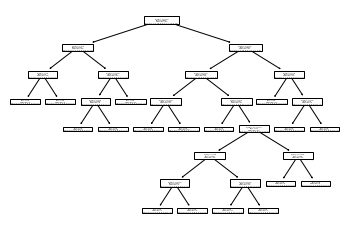

In [21]:
tree.plot_tree(model)

In [22]:
predict_test = model.predict(test_x)
print('Target on test data',predict_test)

Target on test data [ 1  1  8  9  2  2  2  4  4  8  5  5  5  6  6  6  8  7  7  8 10  8 10  1
  8 10 10  6 10 10  2  2]


[Text(154.84500000000003, 203.85, 'X[48] <= 100.0\ngini = 0.899\nsamples = 99\nvalue = [11, 9, 10, 9, 9, 9, 11, 10, 9, 12]'),
 Text(66.96000000000001, 176.67000000000002, 'X[16] <= 75.5\ngini = 0.744\nsamples = 38\nvalue = [0, 0, 0, 9, 0, 9, 0, 8, 0, 12]'),
 Text(33.480000000000004, 149.49, 'X[50] <= 3.5\ngini = 0.5\nsamples = 18\nvalue = [0, 0, 0, 9, 0, 9, 0, 0, 0, 0]'),
 Text(16.740000000000002, 122.31, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0, 0, 0, 0, 0, 0]'),
 Text(50.220000000000006, 122.31, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0, 0, 0, 0]'),
 Text(100.44000000000001, 149.49, 'X[19] <= 399.0\ngini = 0.48\nsamples = 20\nvalue = [0, 0, 0, 0, 0, 0, 0, 8, 0, 12]'),
 Text(83.70000000000002, 122.31, 'X[8] <= 56.0\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 0, 0, 8, 0, 1]'),
 Text(66.96000000000001, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(100.44000000000001, 95.13, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 

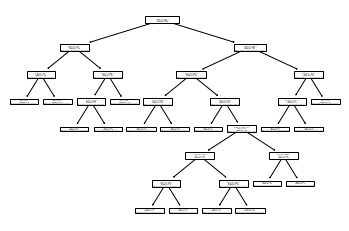

In [23]:
treeModel = tree.DecisionTreeClassifier()
treeModel = treeModel.fit(train_x, train_y)
tree.plot_tree(treeModel)

In [24]:
#X = data.drop(columns=['52'],axis=1)
#y = data['52']
#clf = svm.SVC(kernel='linear', C=1)
#scores = cross_val_score(clf, X, y, cv=5)
#print(scores, scores.mean())

In [25]:
blv = RandomForestClassifier(n_estimators=100)

In [26]:
blv = blv.fit(train_x,train_y)

In [27]:
y_pred=blv.predict(test_x)

In [28]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.96875


In [29]:
#elv = ExtraTreesClassifier()
blv.fit(reduce_train_x, reduce_train_y)
yhat = blv.predict(reduce_test_x)
print("Accuracy:",metrics.accuracy_score(reduce_test_y, yhat))

Accuracy: 0.90625


In [30]:
elv = ExtraTreesClassifier()
elv.fit(train_x, train_y)
yhat = elv.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, yhat))

Accuracy: 0.9375


In [31]:
elv = ExtraTreesClassifier()
elv.fit(reduce_train_x, reduce_train_y)
yhat = elv.predict(reduce_test_x)
print("Accuracy:",metrics.accuracy_score(reduce_test_y, yhat))

Accuracy: 0.96875


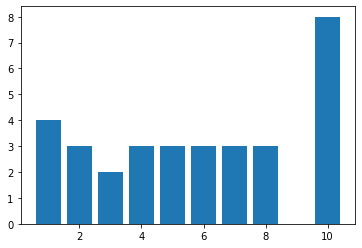

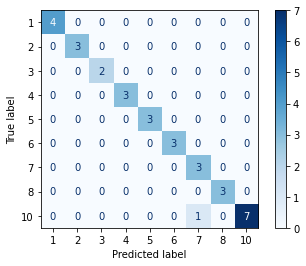

<Figure size 1440x1440 with 0 Axes>

In [37]:
cf_matrix = confusion_matrix(reduce_test_y, yhat)

#print(cf_matrix)

labels, counts = np.unique(reduce_test_y, return_counts=True)
plt.bar(labels, counts, align='center')
#predicted_labels = classifier.predict(X_test)
cnf_matrix = confusion_matrix(reduce_test_y, yhat)
disp = plot_confusion_matrix(elv, reduce_test_x, reduce_test_y,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)
plt.figure(figsize=(20,20))
plt.show()